***Problem Statement :***
- Prepare a model for glass classification using KNN

***Data Description :***

- RI : refractive index

- Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

- Mg: Magnesium

- AI: Aluminum

- Si: Silicon

- K:Potassium

- Ca: Calcium

- Ba: Barium

- Fe: Iron

***Type: Type of glass: (class attribute)***
1) building_windows_float_processed

2) building_windows_non_float_processed

3) vehicle_windows_float_processed

4) vehicle_windows_non_float_processed (none in this database)

5) containers

6) tableware

7) headlamps



In [2]:
# Importing usefull libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing given dataset
df = pd.read_csv('glass.csv')

# Showing first 5 rows from given dataset
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
# Adding glass types in "Type" column

data = df.copy()

data.loc[df['Type'] == 1, 'Type'] = 'building_windows_float_processed'
data.loc[df['Type'] == 2, 'Type'] = 'building_windows_non_float_processed' 
data.loc[df['Type'] == 3, 'Type'] = 'vehicle_windows_float_processed' 
data.loc[df['Type'] == 4, 'Type'] = 'vehicle_windows_non_float_processed' 
data.loc[df['Type'] == 5, 'Type'] = 'containers' 
data.loc[df['Type'] == 6, 'Type'] = 'tableware' 
data.loc[df['Type'] == 7, 'Type'] = 'headlamps'

data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,building_windows_float_processed
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,headlamps
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,headlamps
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,headlamps
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,headlamps


In [5]:
# Unique Types
data["Type"].unique()

array(['building_windows_float_processed',
       'building_windows_non_float_processed',
       'vehicle_windows_float_processed', 'containers', 'tableware',
       'headlamps'], dtype=object)

In [6]:
# Information about given data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [7]:
# Describing the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000


In [8]:
# checking null values present in given dataset
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

***Histogram :***

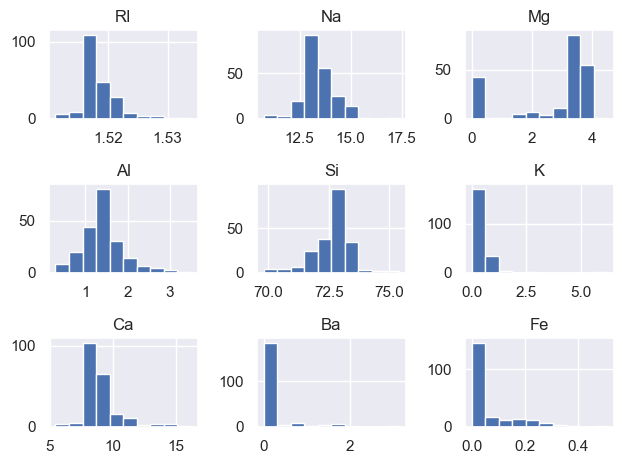

In [9]:
data.hist()
plt.tight_layout()

***Model Building & Training :***

In [10]:
sc = StandardScaler()

In [11]:
x = data.iloc[:,:-1]  # Independent variable
y = data.iloc[:,-1]  # Dependent variable

In [12]:
x = sc.fit_transform(x)

x

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [13]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [14]:
knn = KNeighborsClassifier()

knn.fit(xtrain,ytrain)

ypred = knn.predict(xtest)

***Confusion Matrix :***

In [15]:
confusion_matrix(ytest,ypred)

array([[14,  4,  0,  0,  0,  1],
       [ 0, 10,  1,  0,  1,  0],
       [ 0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 4,  2,  0,  0,  0,  0]], dtype=int64)

***Classification Report :***

In [16]:
print(classification_report(ytest,ypred))

                                      precision    recall  f1-score   support

    building_windows_float_processed       0.78      0.74      0.76        19
building_windows_non_float_processed       0.62      0.83      0.71        12
                          containers       0.50      1.00      0.67         1
                           headlamps       1.00      1.00      1.00         4
                           tableware       0.50      1.00      0.67         1
     vehicle_windows_float_processed       0.00      0.00      0.00         6

                            accuracy                           0.70        43
                           macro avg       0.57      0.76      0.63        43
                        weighted avg       0.63      0.70      0.66        43



***KNN score :***

In [17]:
print('KNN score for Training :', knn.score(xtrain,ytrain))
print('KNN score for Testing :', knn.score(xtest,ytest))

KNN score for Training : 0.7953216374269005
KNN score for Testing : 0.6976744186046512


***Selecting best value for k :***

In [18]:
trainac = []
testac = []
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred = knn.predict(xtest)
    trainac.append(knn.score(xtrain,ytrain))
    testac.append(knn.score(xtest,ytest))

Text(0, 0.5, 'Accuracy')

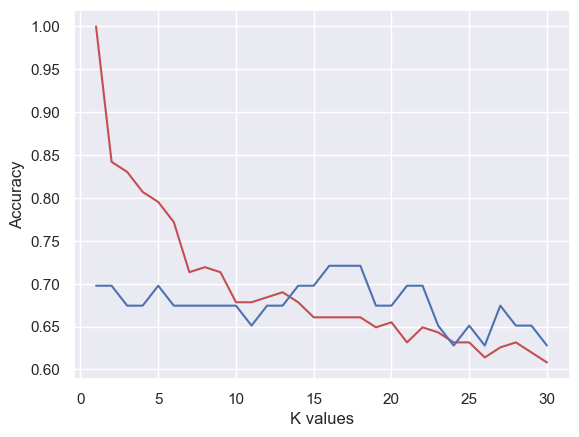

In [19]:
plt.plot(range(1,31), trainac,color = 'r')
plt.plot(range(1,31), testac, color = 'b')
plt.xlabel('K values')
plt.ylabel('Accuracy')

In [20]:
knn = KNeighborsClassifier(n_neighbors=26)

knn.fit(xtrain,ytrain)

ypred = knn.predict(xtest)

print('KNN score for Training :', knn.score(xtrain,ytrain))
print('KNN score for Testing :', knn.score(xtest,ytest))

KNN score for Training : 0.6140350877192983
KNN score for Testing : 0.627906976744186
